In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/data.csv")
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [4]:
print("Shape:", df.shape)
df.info()

Shape: (16857, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-n

In [5]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zone2_humidity,15990.0,39.494553,10.129513,-77.265503,37.757500,40.293333,43.000000,77.265503
zone3_temperature,16055.0,21.665733,2.594309,6.543921,20.533333,21.767500,22.760000,36.823982
zone3_humidity,15979.0,38.201314,10.144388,-71.406273,36.592500,38.400000,41.433333,71.406273
zone4_temperature,16041.0,20.239922,2.783050,4.613485,19.266667,20.290000,21.356667,35.921144
zone4_humidity,16076.0,37.945608,10.769813,-81.446225,35.200000,38.090000,41.560833,81.446225
zone5_temperature,16019.0,19.052613,2.346158,5.921094,18.061111,19.050000,20.100000,32.157594
zone5_humidity,16056.0,50.289131,18.722516,-141.640143,45.290000,48.854429,53.918333,141.640143
zone6_temperature,16009.0,6.469934,8.867993,-42.987365,2.930000,6.263333,9.690000,55.932271
zone6_humidity,16010.0,59.162913,52.657787,-353.393026,37.066667,62.766667,86.590000,353.393026
zone7_temperature,16063.0,19.672472,2.879815,3.578021,18.500000,19.600000,21.000000,35.712952


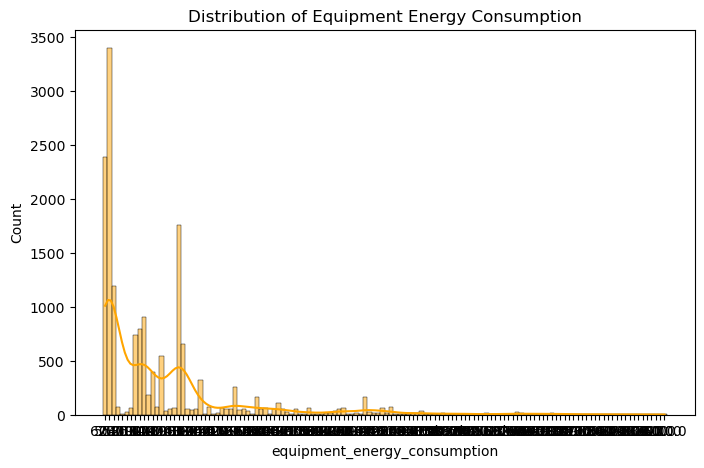

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['equipment_energy_consumption'], kde=True, color="orange")
plt.title("Distribution of Equipment Energy Consumption")
plt.show()

<Figure size 1600x1000 with 0 Axes>

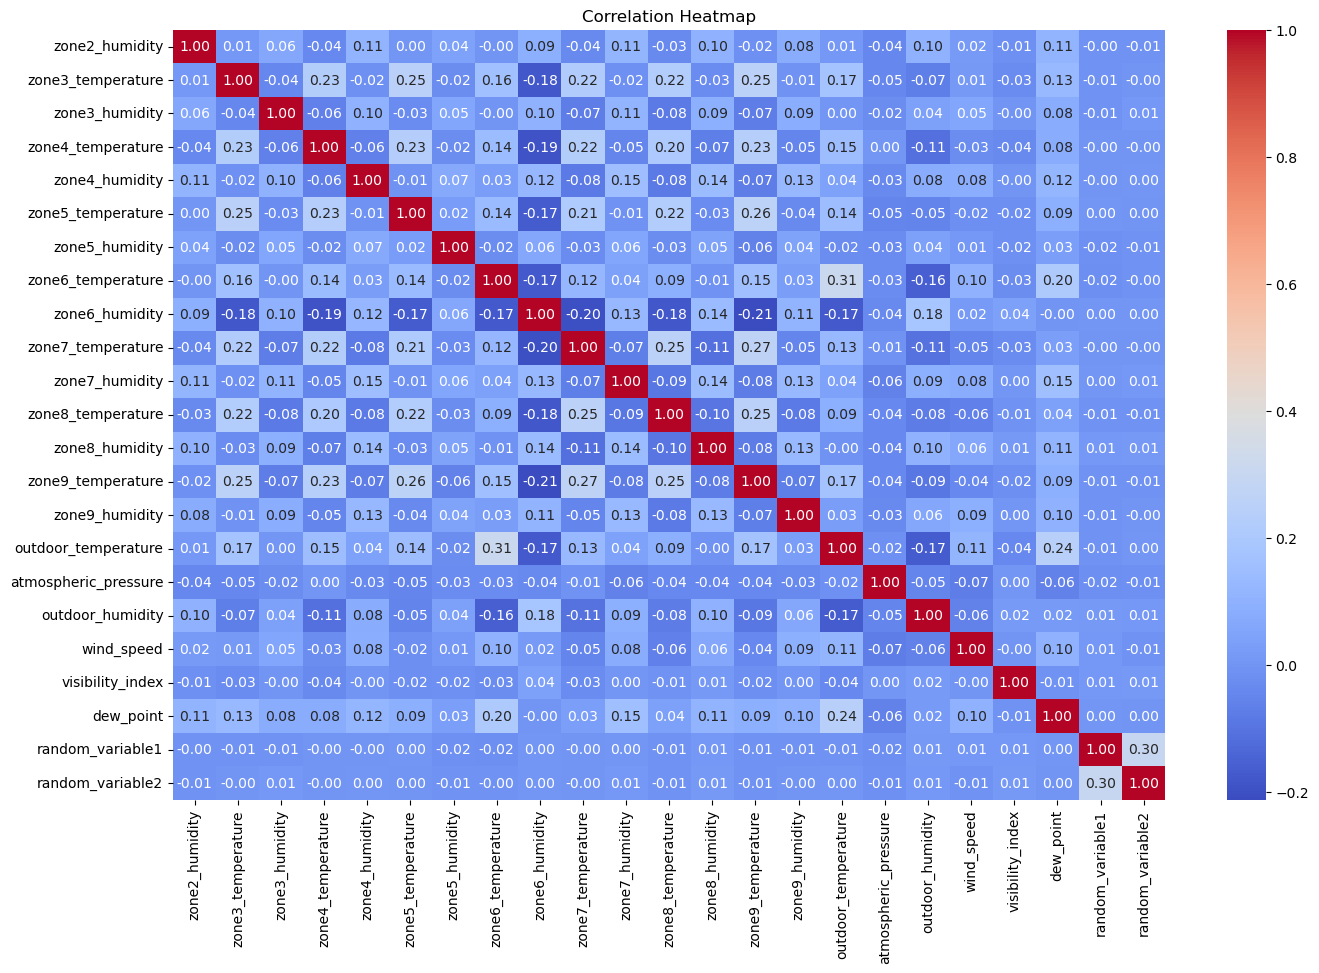

In [9]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
df.isnull().sum()

df.fillna(df.mean(numeric_only=True), inplace=True)

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday


In [12]:
df.drop(columns=['timestamp'], inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('equipment_energy_consumption', axis=1))
y = df['equipment_energy_consumption']


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['equipment_energy_consumption'])  # Features
y = df['equipment_energy_consumption']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

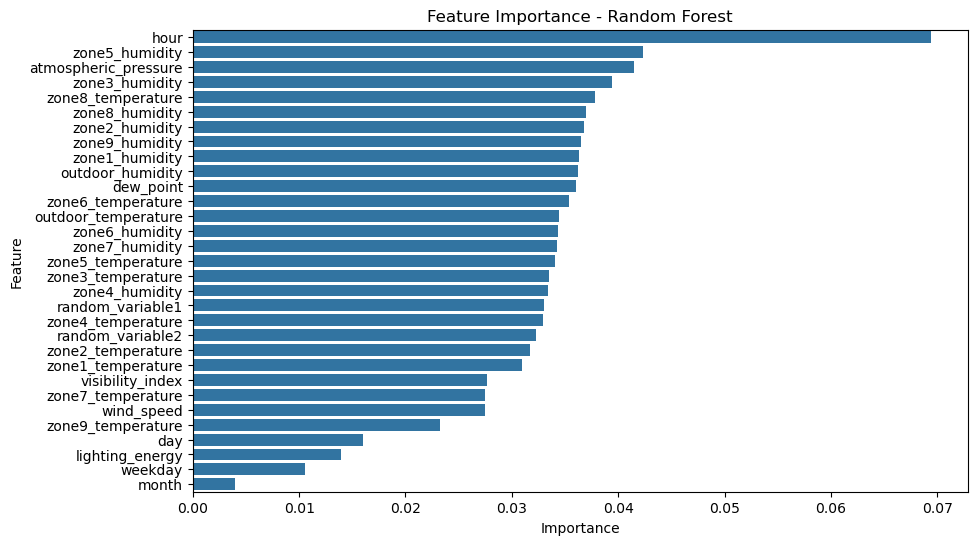

In [23]:
importances = rf.feature_importances_
feature_names = X_train.columns  # Now X_train has columns attribute

feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df)
plt.title("Feature Importance - Random Forest")
plt.show()


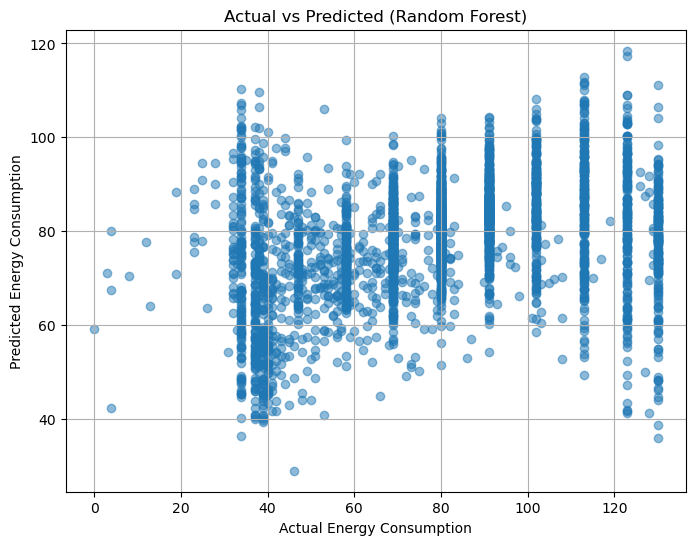

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted (Random Forest)")
plt.grid()
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 19.1307615658363
Mean Squared Error (MSE): 674.2137372010677
Root Mean Squared Error (RMSE): 25.96562606988454
R² Score: 0.11466545356918068


In [25]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-Validation RMSE: {np.mean(np.sqrt(-cv_scores))}")


Cross-Validation RMSE: 27.161588140984513


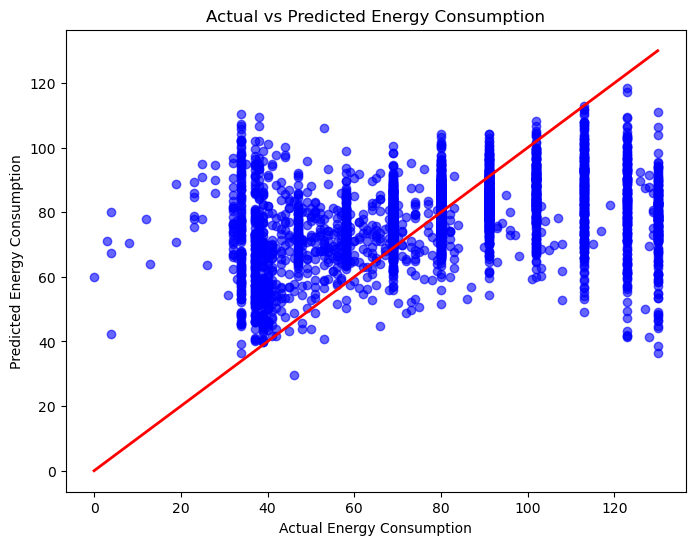

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()